In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load data
data = pd.read_csv('data/train.csv', parse_dates = ['Date'])
store = pd.read_csv('data/store.csv') 
print('training data loaded')

C:\Users\Hiroshi.Hiromax\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


training data loaded


In [4]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Only use stores that are open to train
data = data[data['Open'] != 0]

In [6]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
data = data.merge(store, on = 'Store', copy = False)

In [8]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
# Break down date column
data['year'] = data.Date.apply(lambda x: x.year)
data['month'] = data.Date.apply(lambda x: x.month)
#data['day'] = data.Date.apply(lambda x: x.day)
data['woy'] = data.Date.apply(lambda x: x.weekofyear)
data.drop(['Date'], axis = 1, inplace= True)

In [10]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,woy
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31


In [11]:
# Calculate time competition open time in months
data['CompetitionOpen'] = 12 * (data.year - data.CompetitionOpenSinceYear) + (data.month - data.CompetitionOpenSinceMonth)
data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1, inplace = True)

In [12]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,woy,CompetitionOpen
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0


In [13]:
# Promo open time in months
data['PromoOpen'] = 12 * (data.year - data.Promo2SinceYear) + (data.woy - data.Promo2SinceWeek) / float(4)
#data['PromoOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
data.drop(['Promo2SinceYear', 'Promo2SinceWeek'], axis = 1,inplace = True)

In [14]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,year,month,woy,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0


In [15]:
# Get promo months
data['p_1'] = data.PromoInterval.apply(lambda x: x[:3] if type(x) == str else 0)
data['p_2'] = data.PromoInterval.apply(lambda x: x[4:7] if type(x) == str else 0)
data['p_3'] = data.PromoInterval.apply(lambda x: x[8:11] if type(x) == str else 0)
data['p_4'] = data.PromoInterval.apply(lambda x: x[12:15] if type(x) == str else 0)

In [16]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,year,month,woy,CompetitionOpen,PromoOpen,p_1,p_2,p_3,p_4
0,1,5,5263,555,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
1,1,4,5020,546,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
2,1,3,4782,523,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
3,1,2,5011,560,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
4,1,1,6102,612,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0


In [17]:
# Get dummies for categoricals
data = pd.get_dummies(data, columns = ['p_1', 'p_2', 'p_3', 'p_4', 
                                       'StateHoliday' , 
                                       'StoreType', 
                                       'Assortment'])
data.drop(['Store',
           'PromoInterval', 
           'p_1_0', 'p_2_0', 'p_3_0', 'p_4_0', 
           'StateHoliday_0', 
           'year'], axis=1,inplace=True)

In [18]:
data.to_csv('data_.csv')

In [19]:
data.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,woy,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,5263,555,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
1,4,5020,546,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
2,3,4782,523,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
3,2,5011,560,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
4,1,6102,612,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0


In [20]:
# Fill in missing values
data = data.fillna(0)
data = data.sort_index(axis=1)

In [21]:
data.head()

,Assortment_a,Assortment_b,Assortment_c,CompetitionDistance,CompetitionOpen,Customers,DayOfWeek,Open,Promo,Promo2,...,p_2_Apr,p_2_Jun,p_2_May,p_3_Aug,p_3_Jul,p_3_Sep,"p_4_,De",p_4_Nov,p_4_Oct,woy
0,1,0,0,1270.0,82.0,555,5,1,1,0,...,0,0,0,0,0,0,0,0,0,31
1,1,0,0,1270.0,82.0,546,4,1,1,0,...,0,0,0,0,0,0,0,0,0,31
2,1,0,0,1270.0,82.0,523,3,1,1,0,...,0,0,0,0,0,0,0,0,0,31
3,1,0,0,1270.0,82.0,560,2,1,1,0,...,0,0,0,0,0,0,0,0,0,31
4,1,0,0,1270.0,82.0,612,1,1,1,0,...,0,0,0,0,0,0,0,0,0,31


In [22]:
X_train = data.drop(['Sales', 'Customers'], axis = 1)
y_train = data.Sales

In [23]:
feature_cols = [col for col in X_train.columns]

In [24]:
X_train.head()

,Assortment_a,Assortment_b,Assortment_c,CompetitionDistance,CompetitionOpen,DayOfWeek,Open,Promo,Promo2,PromoOpen,...,p_2_Apr,p_2_Jun,p_2_May,p_3_Aug,p_3_Jul,p_3_Sep,"p_4_,De",p_4_Nov,p_4_Oct,woy
0,1,0,0,1270.0,82.0,5,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
1,1,0,0,1270.0,82.0,4,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
2,1,0,0,1270.0,82.0,3,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
3,1,0,0,1270.0,82.0,2,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
4,1,0,0,1270.0,82.0,1,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31


In [25]:
y_train.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [26]:
# Fit random forest model
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 100)
rf.fit(X_train, y_train)
print('model fit')

model fit


In [27]:
rf.feature_importances_.max()

0.39399781332521155

In [28]:
def varImpPlot(clf, feature_names, topN = 10, verbose = True):
    feature_names = np.array(feature_names)
    feature_importance = clf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    
    topN_feature = feature_importance[sorted_idx][len(feature_importance) - topN:]
    topN_feature_name = feature_names[sorted_idx][len(feature_importance) - topN:]
    pos = np.arange(topN) + .5
    plt.barh(pos, topN_feature, align='center')
    plt.yticks(pos, topN_feature_name)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    rev_sorted_idx = np.argsort(feature_importance)[::-1]
    if verbose:
        for i, v in zip(feature_names[rev_sorted_idx], feature_importance[rev_sorted_idx]):
            print(i, v)

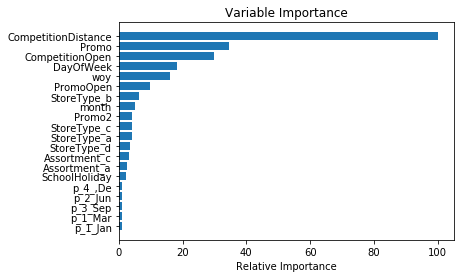

In [29]:
varImpPlot(rf, feature_cols, topN=20, verbose=False)

In [30]:
# Load and process test data
test = pd.read_csv('data/test.csv', parse_dates = ['Date'])
test = process_data(test)

# Ensure same columns in test data as training
for col in data.columns:
    if col not in test.columns:
        test[col] = np.zeros(test.shape[0])
        
test = test.sort_index(axis=1).set_index('Id')
print('test data loaded and processed')

# Make predictions
X_test = test.drop(['Sales', 'Customers'], axis=1).values
y_test = rf.predict(X_test)

# Make Submission
result = pd.DataFrame({'Id': test.index.values, 'Sales': y_test}).set_index('Id')
result = result.sort_index()
result.to_csv('submission.csv')
print('submission created')

test data loaded and processed
submission created


In [1]:
def process_data(data):
	'''
	Processes data for model
		INPUT: DataFrame
		OUTPUT: DataFrame
	'''
	# Merge store data
	data = data.merge(store, on = 'Store', copy = False)

	# Break down date column
	data['year'] = data.Date.apply(lambda x: x.year)
	data['month'] = data.Date.apply(lambda x: x.month)
	#     data['dow'] = data.Date.apply(lambda x: x.dayofweek)
	data['woy'] = data.Date.apply(lambda x: x.weekofyear)
	data.drop(['Date'], axis = 1, inplace= True)

	# Calculate time competition open time in months
	data['CompetitionOpen'] = 12 * (data.year - data.CompetitionOpenSinceYear) + \
	(data.month - data.CompetitionOpenSinceMonth)
	data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
	data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1, 
	         inplace = True)

	# Promo open time in months
	data['PromoOpen'] = 12 * (data.year - data.Promo2SinceYear) + \
	(data.woy - data.Promo2SinceWeek) / float(4)
	data['PromoOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
	data.drop(['Promo2SinceYear', 'Promo2SinceWeek'], axis = 1, 
	         inplace = True)

	# Get promo months
	data['p_1'] = data.PromoInterval.apply(lambda x: x[:3] if type(x) == str else 0)
	data['p_2'] = data.PromoInterval.apply(lambda x: x[4:7] if type(x) == str else 0)
	data['p_3'] = data.PromoInterval.apply(lambda x: x[8:11] if type(x) == str else 0)
	data['p_4'] = data.PromoInterval.apply(lambda x: x[12:15] if type(x) == str else 0)


	# Get dummies for categoricals
	data = pd.get_dummies(data, columns = ['p_1', 'p_2', 'p_3', 'p_4', 
	                                       'StateHoliday' , 
	                                       'StoreType', 
	                                       'Assortment'])
	data.drop(['Store',
	           'PromoInterval', 
	           'p_1_0', 'p_2_0', 'p_3_0', 'p_4_0', 
	           'StateHoliday_0', 
	           'year'], axis=1,inplace=True)


	# Fill in missing values
	data = data.fillna(0)
	data = data.sort_index(axis=1)

	return data


In [8]:
# Process training data
data = process_data(data)
print('training data processed')

training data processed
